# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [1]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [2]:
import pandas as pd

Import project files

In [3]:
#import sys
#sys.path.append("utils")
# from utils import models

In [4]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [5]:
train_file = 'data/df_filtered_1000.csv'

Getting dataframe

In [6]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 15.6 ms
Wall time: 35 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [7]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 21.4 s
Wall time: 23.4 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Embedding the word list

In [ ]:
embedded_dict = cluster_utils.embed_corpus(word_list)

Clustering

eps 1.8145278898835595
CPU times: total: 3.41 s
Wall time: 2.98 s


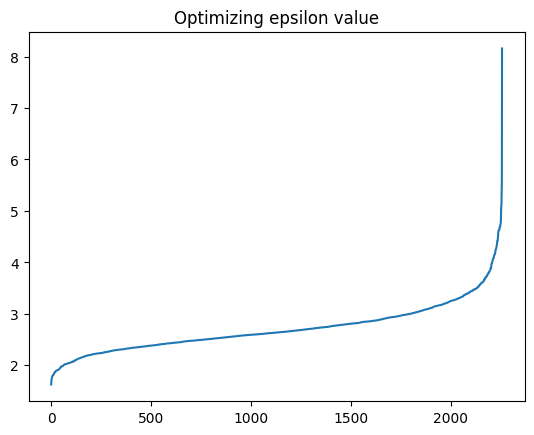

In [8]:
%%time

cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [9]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

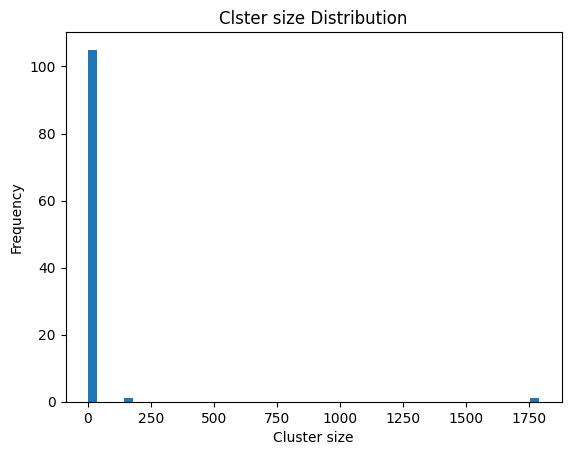

In [10]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

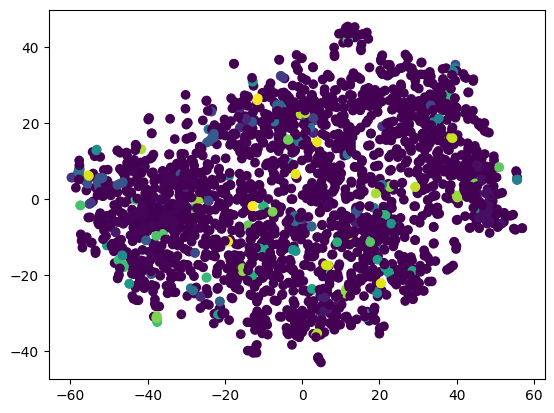

CPU times: total: 1min 10s
Wall time: 21 s


In [11]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.056689203


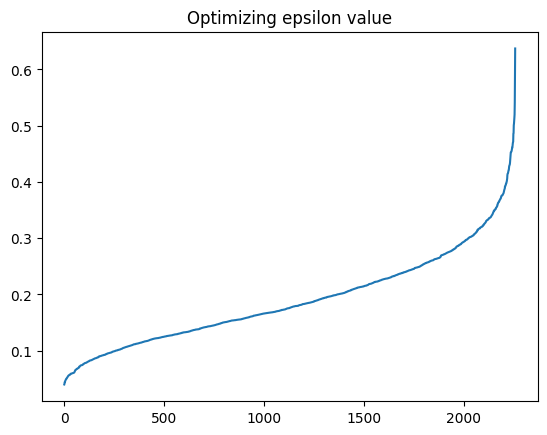

In [12]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

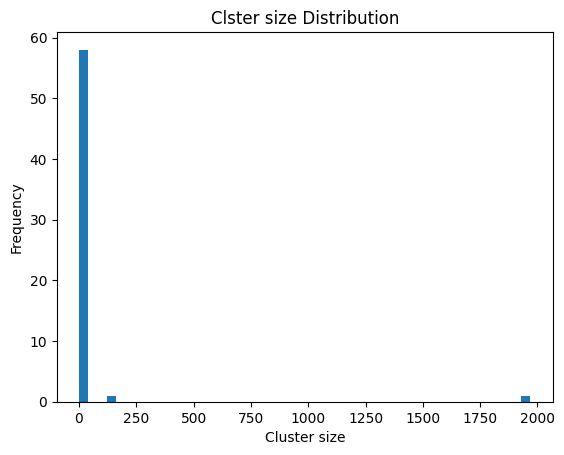

In [13]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

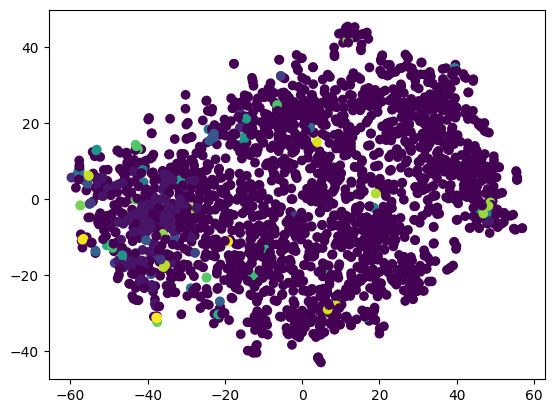

CPU times: total: 1min 9s
Wall time: 20.8 s


In [14]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [15]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

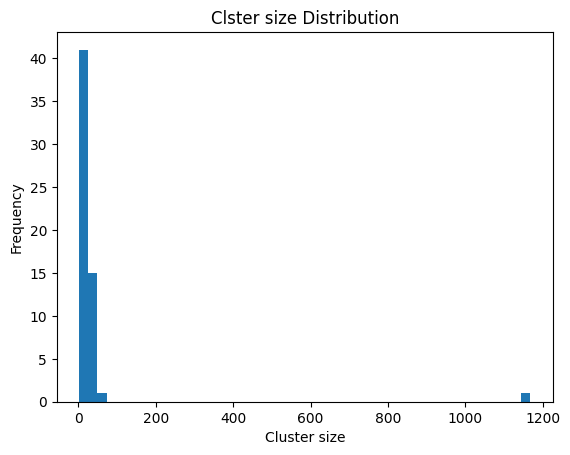

In [16]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

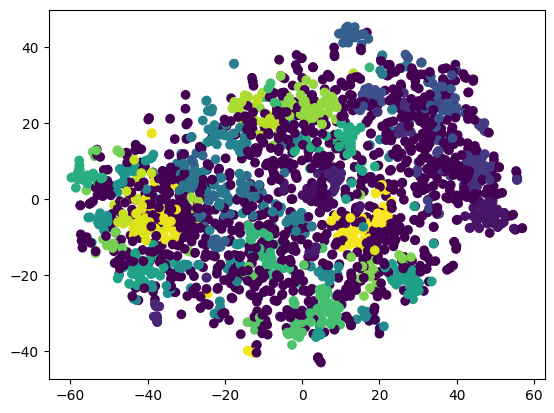

In [17]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [18]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 107 clusters
Cosine distance:	 60 clusters
HDBSCAN clustering:	 58 clusters


Plotting Jaccard index histogram

In [19]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['chocolate', 'hi', 'cola', 'love', 'banana']

Getting distance threshold

In [20]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) Replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [21]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.34080288 the next cluster is too wide and wont be replaced: ['fact', 'many', 'finally', 'make', 'first', 'thing', 'stick', 'close', 'enough', 'like', 'jump', 'need', 'yeah', 'high', 'expect', 'could', 'unfortunately', 'hold', 'fly', 'hear', 'easy', 'exactly', 'run', 'leave', 'tell', 'let', 'blow', 'barely', 'always', 'third', 'last', 'matter', 'hit', 'look', 'anyone', 'bring', 'second', 'straight', 'maybe', 'doubt', 'turn', 'go', 'find', 'yet', 'three', 'certainly', 'something', 'either', 'since', 'yesterday', 'every', 'absolutely', 'otherwise', 'dumb', 'really', 'two', 'next', 'know', 'today', 'sure', 'another', 'hope', 'listen', 'much', 'mess', 'call', 'break', 'anything', 'catch', 'well', 'mind', 'almost', 'spare', 'wonder', 'five', 'think', 'hopefully', 'get', 'everything', 'wrong', 'reason', 'throw', 'obviously', 'possibly', 'able', 'less', 'four', 'pretty', 'definitely', 'yes', 

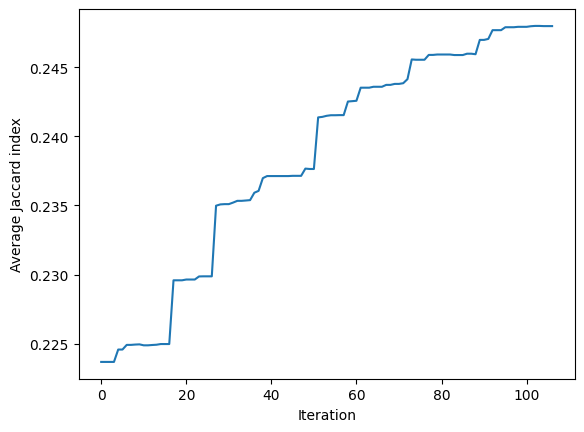

In [22]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [23]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - scott ...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,like and twisted is fun ... : this book is lik...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


In [65]:
word_dict

{'companion': {'protected': None, 'lemma': None, 'replaced': None},
 'daily': {'protected': None, 'lemma': None, 'replaced': None},
 'awesome': {'protected': None, 'lemma': None, 'replaced': 'exciting'},
 'requirements': {'protected': None, 'lemma': 'requirement', 'replaced': None},
 'wonderfully': {'protected': None, 'lemma': None, 'replaced': None},
 'fact': {'protected': None, 'lemma': None, 'replaced': None},
 'movies': {'protected': None, 'lemma': 'movie', 'replaced': None},
 'stinks': {'protected': None, 'lemma': 'stink', 'replaced': None},
 'random': {'protected': None, 'lemma': None, 'replaced': None},
 'free': {'protected': None, 'lemma': None, 'replaced': 'new'},
 'lowest': {'protected': None, 'lemma': 'low', 'replaced': None},
 'did': {'protected': True, 'lemma': None, 'replaced': None},
 'project': {'protected': None, 'lemma': None, 'replaced': None},
 'references': {'protected': None, 'lemma': 'reference', 'replaced': None},
 'wild': {'protected': None, 'lemma': None, 'rep

#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.1908299 	replacing ['b', 'u', 'l', 'r'] in f
distance: 0.13134822 	replacing ['waste', 'struggle'] in problems
distance: 0.33559546 the next cluster is too wide and wont be replaced: ['many', 'finally', 'make', 'first', 'thing', 'people', 'enough', 'like', 'need', 'yeah', 'damn', 'expect', 'could', 'unfortunately', 'hold', 'try', 'hear', 'wait', 'easy', 'say', 'exactly', 'leave', 'tell', 'let', 'always', 'last', 'matter', 'girl', 'look', 'anyone', 'bring', 'second', 'guy', 'maybe', 'good', 'doubt', 'turn', 'go', 'find', 'yet', 'true', 'three', 'certainly', 'something', 'either', 'since', 'yesterday', 'every', 'absolutely', 'otherwise', 'boy', 'dumb', 'really', 'two', 'long', 'next', 'know', 'bad', 'today', 'explain', 'baby', 'sure', 'another', 'hope', 'listen', 'summer', 'much', 'call', 'work', 'anything', 'well', 'different', 'old', 'must', 'mind', 'almost', 'wonder', 'five', 'think'

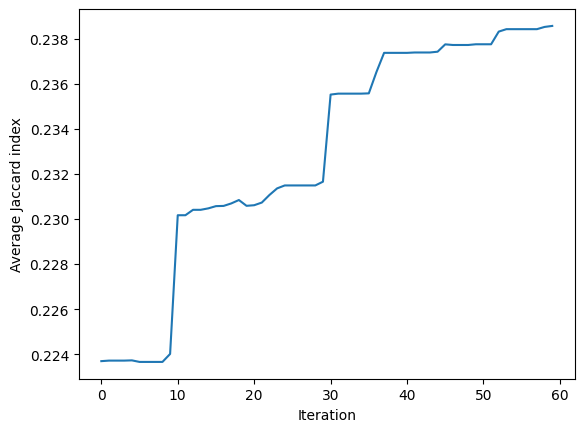

In [24]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [25]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was exciting ! ! ! : i like it . it was ver...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this product was just wh...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is good ... : this book is si...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.3564538 the next cluster is too wide and wont be replaced: ['daily', 'transport', 'translate', 'client', 'library', 'service', 'manager', 'owner', 'section', 'business', 'press', 'application', 'board', 'research', 'area', 'bank', 'search', 'location', 'information', 'endorse', 'rental', 'retail', 'student', 'development', 'job', 'access', 'publish', 'customer', 'travel', 'group', 'center', 'management', 'company', 'office', 'medical', 'unit', 'view', 'program']
distance: 0.34601483 the next cluster is too wide and wont be replaced: ['fact', 'man', 'suck', 'stuff', 'tired', 'maybe', 'everytime', 'alone', 'wat', 'sure', 'well', 'sleep', 'guess', 'mine', 'right', 'anyway', 'crap', 'weak', 'bunch', 'though']
distance: 0.35082215 the next cluster is too wide and wont be replaced: ['messy', 'weave', 'tongue', 'tight', 'shoulder', 'mirror', 'thumb', 'cheek', 'dry', 'stink', 'ear', 'gently',

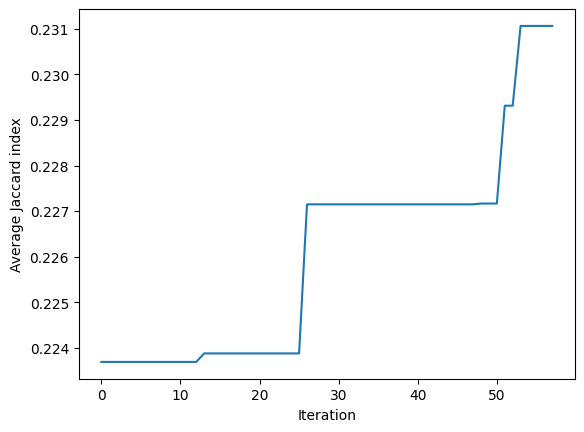

In [26]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [27]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this product was just wh...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is good ... : this book is si...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


Looking at the histogram again

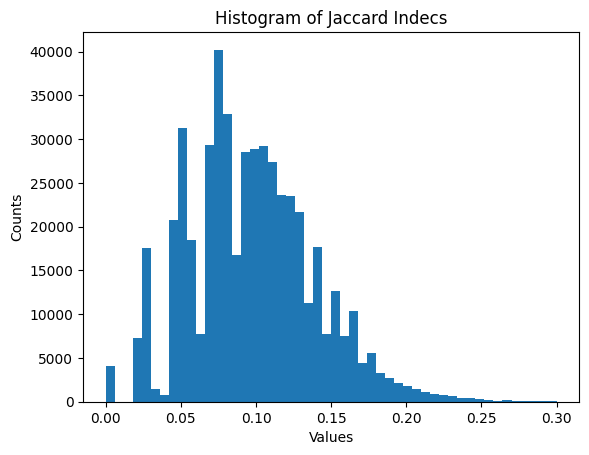

CPU times: total: 7.89 s
Wall time: 8 s


In [28]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

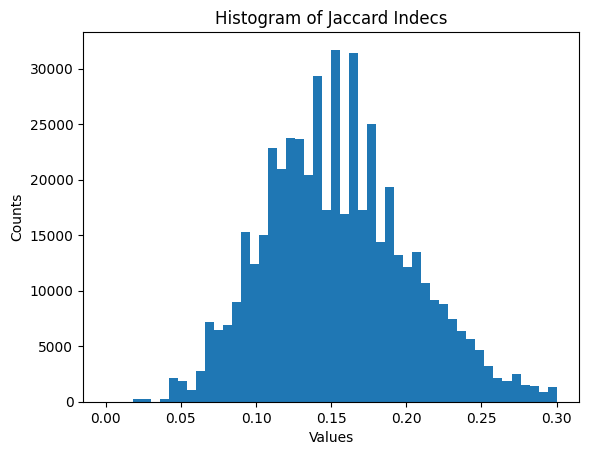

CPU times: total: 8.56 s
Wall time: 8.62 s


In [29]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

In [30]:
print('Eucolidian dist:\t', df_2.iloc[3, 4])
print('Cosine dist:\t\t', df_3.iloc[3, 4])
print('HDNSCAN:\t\t', df_4.iloc[3, 4])

Eucolidian dist:	 it was great ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the fun .
Cosine dist:		 it was exciting ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the night .
HDNSCAN:		 it was great ! ! ! : i like it . it was very cool to read about vampire and other legendary crature of the night .


In [74]:
nlp_utils.get_stat(word_dict)

(135, 868, 358, 3145)

## 4) Force anonymity

### Get anonymity degree

Before replacement

In [31]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


After replacement

In [32]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


### 4.1) Method 1 - Forcing Anonymity by Finding the nearest k neighbors
Steps:
1. Finding k nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

#### Toy examples

In [33]:
k=2
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3], [1, 2], [4, 5]]

In [34]:
k=3
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3, 2], [1, 5, 4]]

The algorithm is greedy

In [35]:
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala'], k=3)

[[0, 3, 2], [1, 4]]

#### Running on data

##### k=2, df - first 100

In [36]:
df_2_small = anonym_utils.force_anonym(df_2[:100], k=2)
print(anonym_utils.get_anonym_degree(df_2_small['force_anon_txt']))

Start: get_anonym_degree: 1
neighbors: [0, 27]
neighbors: [1, 50]
neighbors: [2, 6]
neighbors: [3, 48]
neighbors: [4, 97]
neighbors: [5, 84]
neighbors: [7, 73]
neighbors: [8, 25]
neighbors: [9, 87]
neighbors: [10, 72]
neighbors: [11, 15]
neighbors: [12, 54]
neighbors: [13, 57]
neighbors: [14, 18]
neighbors: [16, 90]
neighbors: [17, 59]
neighbors: [19, 21]
neighbors: [20, 37]
neighbors: [22, 86]
neighbors: [23, 44]
neighbors: [24, 26]
neighbors: [28, 80]
neighbors: [29, 53]
neighbors: [30, 93]
neighbors: [31, 85]
neighbors: [32, 71]
neighbors: [33, 91]
neighbors: [34, 74]
neighbors: [35, 60]
neighbors: [36, 82]
neighbors: [38, 56]
neighbors: [39, 77]
neighbors: [40, 58]
neighbors: [41, 69]
neighbors: [42, 65]
neighbors: [43, 45]
neighbors: [46, 64]
neighbors: [47, 83]
neighbors: [49, 79]
neighbors: [51, 55]
neighbors: [52, 70]
neighbors: [61, 94]
neighbors: [62, 98]
neighbors: [63, 66]
neighbors: [67, 92]
neighbors: [68, 78]
neighbors: [75, 76]
neighbors: [81, 89]
neighbors: [88, 99]
ne

##### k=3, df - first 100

In [37]:
df_2_small = anonym_utils.force_anonym(df_2.loc[:100], k=3)
print(anonym_utils.get_anonym_degree(df_2_small['force_anon_txt']))

Start: get_anonym_degree: 1
neighbors: [0, 27, 60]
neighbors: [1, 50, 17]
neighbors: [2, 6, 80]
neighbors: [3, 100, 48]
neighbors: [4, 97, 13]
neighbors: [5, 84, 86]
neighbors: [7, 73, 99]
neighbors: [8, 25, 46]
neighbors: [9, 87, 65]
neighbors: [10, 72, 70]
neighbors: [11, 15, 85]
neighbors: [12, 54, 52]
neighbors: [14, 18, 31]
neighbors: [16, 90, 71]
neighbors: [19, 59, 21]
neighbors: [20, 37, 51]
neighbors: [22, 36, 82]
neighbors: [23, 44, 47]
neighbors: [24, 26, 89]
neighbors: [28, 62, 98]
neighbors: [29, 53, 64]
neighbors: [30, 93, 35]
neighbors: [32, 33, 91]
neighbors: [34, 74, 58]
neighbors: [38, 57, 56]
neighbors: [39, 77, 43]
neighbors: [40, 96, 95]
neighbors: [41, 69, 83]
neighbors: [42, 88, 66]
neighbors: [45, 94, 92]
neighbors: [49, 79, 61]
neighbors: [55, 76, 81]
neighbors: [63, 78, 68]
neighbors: [67, 75]
End: get_anonym_degree: 1
(1, [[82], [62], [74], [44], [41], [99]])


In [40]:
df_2_small = anonym_utils.force_anonym(df_2.loc[[0, 64, 14, 1, 40, 28],:].reset_index(), k=3)
df_2_small['force_anon_txt']

Start: get_anonym_degree: 1
neighbors: [0, 3, 5]
neighbors: [1, 4, 2]
Could not create a bow: empty vocabulary; perhaps the documents only contain stop words
End: get_anonym_degree: None


0    * from the * : i have a * of this * and * it a...
1    * : * * as describe and * on * . was a * and j...
2    it * for me .. : * this was not go to * becaus...
3    * ! : these * are not the " * " * but are re -...
4    most * : this is the most * * on * * in * . * ...
5    do n't * it ! : ever since i * this and * my *...
Name: force_anon_txt, dtype: object

##### k = 3 , df - all 1000

In [41]:
df_2 = anonym_utils.force_anonym(df_2, k=3, word_dict=word_dict_2)
curr_k, un_anonyms = anonym_utils.get_anonym_degree(docs = df_2['force_anon_txt'])
print('Anonymity degree:', curr_k, 'number of un-anonymized documents:', len(un_anonyms))


Start: get_anonym_degree: 1
neighbors: [0, 948, 280]
neighbors: [1, 623, 232]
neighbors: [2, 203, 571]
neighbors: [3, 840, 924]
neighbors: [4, 578, 946]
neighbors: [5, 616, 84]
neighbors: [6, 461, 200]
neighbors: [7, 160, 379]
neighbors: [8, 558, 321]
neighbors: [9, 858, 553]
neighbors: [10, 931, 358]
neighbors: [11, 15, 471]
neighbors: [12, 54, 622]
neighbors: [13, 644, 723]
neighbors: [14, 369, 196]
neighbors: [16, 761, 769]
neighbors: [17, 980, 966]
neighbors: [18, 215, 417]
neighbors: [19, 552, 950]
neighbors: [20, 296, 741]
neighbors: [21, 595, 60]
neighbors: [22, 887, 86]
neighbors: [23, 977, 941]
neighbors: [24, 802, 26]
neighbors: [25, 701, 665]
neighbors: [27, 120, 949]
neighbors: [28, 206, 718]
neighbors: [29, 499, 793]
neighbors: [30, 923, 650]
neighbors: [31, 906, 998]
neighbors: [32, 698, 123]
neighbors: [33, 611, 897]
neighbors: [34, 192, 715]
neighbors: [35, 445, 257]
neighbors: [36, 754, 82]
neighbors: [37, 932, 539]
neighbors: [38, 479, 419]
neighbors: [39, 593, 353]
n

In [57]:
pip install annoy

     ---------------------------------------- 0.0/647.4 kB ? eta -:--:--
     ---------- --------------------------- 174.1/647.4 kB 3.5 MB/s eta 0:00:01
     ---------------- --------------------- 276.5/647.4 kB 2.4 MB/s eta 0:00:01
     ---------------------- --------------- 389.1/647.4 kB 2.0 MB/s eta 0:00:01
     --------------------------- ---------- 460.8/647.4 kB 1.8 MB/s eta 0:00:01
     ---------------------------- --------- 491.5/647.4 kB 1.8 MB/s eta 0:00:01
     ---------------------------- --------- 491.5/647.4 kB 1.8 MB/s eta 0:00:01
     ---------------------------- --------- 491.5/647.4 kB 1.8 MB/s eta 0:00:01
     --------------------------------- ---- 573.4/647.4 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ - 614.4/647.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 647.4/647.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py instal

  DEPRECATION: annoy is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
print(df_2['anon_txt'][0])
print(df_2['force_anon_txt'][0])
print()
print(df_2['anon_txt'][948])
print(df_2['force_anon_txt'][948])
print()
print(df_2['anon_txt'][280])
print(df_2['force_anon_txt'][280])


voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
* from the * : i have a * of this book and love it and ca n't * * the * * * out in a few *

very examples : very examples tools but you need to study it deeply and not just once to get the result . i highly recommend the book .
very * : very * tool but you * to * it * and not just once to get the * . i highly recommend the * .

one of the fun .... love it : well this is one of the fun from ms garwood . just love it ...... ca n't wait for her next book .
one of the * .... love it : well this is one of the * from * * . just love it ...... ca n't * for her next book .


In [45]:
curr_k, un_anonyms = anonym_utils.get_anonym_degree(docs = df_2['force_anon_txt'], min_k=3)
print(len(un_anonyms), 'un-anonymized documents')
un_anonyms.sort()
print(un_anonyms)



88 un-anonymized documents
[[1, 625], [28, 206], [36, 756], [41], [44], [62], [70, 782], [74], [82], [96, 117], [99], [106, 344], [108], [119, 995], [121, 348], [122, 839], [124], [125, 173], [127, 517], [139], [167, 582], [170], [174, 838], [178], [184], [190], [218], [229], [232], [250, 845], [258, 325], [259, 390], [265], [267, 430], [272, 537], [278, 660], [284, 354], [295], [309, 436], [322, 724], [323, 449], [342], [346], [349, 923], [360], [372], [386], [388], [402], [403], [422], [423, 850], [424], [427, 886], [459], [491], [494], [497], [501], [503], [506], [508], [513], [550], [554], [557], [563, 564], [607], [612], [619], [636], [673], [692, 963], [720], [744, 813], [764], [783], [797], [803], [816], [846], [848], [864], [870], [881], [882], [894], [994]]


In [54]:
small_df = anonym_utils.force_anonym(df_2.loc[[0, 948, 280], :].reset_index(), k=3)

Start: get_anonym_degree: 1
neighbors: [0, 2, 1]
End: get_anonym_degree: 3


In [56]:
print(small_df['anon_txt'][0])
print(small_df['force_anon_txt'][0])
print()
print(small_df['anon_txt'][1])
print(small_df['force_anon_txt'][1])
print()
print(small_df['anon_txt'][2])
print(small_df['force_anon_txt'][2])

voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
* from the * : i have a * of this book and * it and ca n't * * the * * * out in a few *

very examples : very examples tools but you need to study it deeply and not just once to get the result . i highly recommend the book .
very * : very * * but you * to * it * and not just once to get the * . i * * the book .

one of the fun .... love it : well this is one of the fun from ms garwood . just love it ...... ca n't wait for her next book .
one of the * .... * it : well this is one of the * from * * . just * it ...... ca n't * for her next book .


In [55]:
small_df

,index,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,force_anon_txt
0,0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...,* from the * : i have a * of this book and * i...
1,948,38634,very helpful: very helpful product but you nee...,1,25,very examples : very examples tools but you ne...,(very) [examples] (very) [examples] [tools] (b...,very * : very * * but you * to * it * and not ...
2,280,12430,one of the best....love it: well this is one o...,1,25,one of the fun .... love it : well this is one...,one (of) (the) best....love (it:) well (this) ...,one of the * .... * it : well this is one of t...


#### Running on small potion of the data

In [ ]:
small_df = anonym_utils.force_anonym(df_2[:5], k=2)

fa 1
Start: get_anonym_degree: 1
fa 2
fa 3
fa 5
fa 6
neighbors: [0, 1]
Before:	 voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
After:	 * from the * : i have a * of this * and * it and ca n't * * the * version * out in a few *
Before:	 caution ! : these track are not the " original " version but are re - record version . so , whether the track are " remastere " or not is irrelevant .
After:	 * ! : these * are not the " * " version but are re - * version . so , whether the * are " * " or not is * .
neighbors: [2, 4]
Before:	 textbook : book ship quickly and was in excellent condition as state . easy transaction would new again
After:	 * : * * * and was in * * as * . * * would * again
Before:	 docker do the job . : this tool was just what i was hope for , and i had no problem with shipping . i highly recommend this tool .
After:	 * do the * . : this * was just what i was * for , and i had no * with * . i * * this 

In [ ]:
small_df['anon_txt']


0    voice from the farm : i have a copy of this bo...
1    caution ! : these track are not the " original...
2    textbook : book ship quickly and was in excell...
3    it was great ! ! ! : i like it . it was very c...
4    docker do the job . : this tools was just what...
Name: anon_txt, dtype: object

In [ ]:
small_df['force_anon_txt']


0    * from the * : i have a * of this * and * it a...
1    * ! : these * are not the " * " version but ar...
2    * : * * * and was in * * as * . * * would * again
3                                                    *
4    * do the * . : this * was just what i was * fo...
Name: force_anon_txt, dtype: object

### 4.2) Force anonymity by iterations
Steps:
1. Order the words in the vocabulary by their rareness.
2. Replace the most rare word with * 
3. Test anonymity degree. If the degree is less than the requested - go back to 2.

#### Toy example

In [ ]:
anonym_utils.force_anonym_by_iteration(['I love choco', 'I love banana', 'love banana'], k=2)

Start: get_anonym_degree: 1
Replace choco
curr_k 1
Replace banana
curr_k 3
Start: get_anonym_degree: 3


['I love *', 'I love *', 'love *']

#### Running on data

In [ ]:
# The full run takes 7 hours!!
anon_txt = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'][:100], k=2)

Start: get_anonym_degree: 1
Replace life
curr_k 1
Replace open
curr_k 1
Replace official
curr_k 1
Replace october
curr_k 1
Replace occasional
curr_k 1
Replace number
curr_k 1
Replace nook
curr_k 1
Replace nirvana
curr_k 1
Replace ninnia
curr_k 1
Replace original
curr_k 1
Replace nevermind
curr_k 1
Replace nap
curr_k 1
Replace myopic
curr_k 1
Replace monitor
curr_k 1
Replace money
curr_k 1
Replace modivation
curr_k 1
Replace model
curr_k 1
Replace middle
curr_k 1
Replace microwave
curr_k 1
Replace necklace
curr_k 1
Replace outrageously
curr_k 1
Replace overview
curr_k 1
Replace pair
curr_k 1
Replace production
curr_k 1
Replace printer
curr_k 1
Replace present
curr_k 1
Replace power
curr_k 1
Replace possibly
curr_k 1
Replace possible
curr_k 1
Replace poorly
curr_k 1
Replace poor
curr_k 1
Replace political
curr_k 1
Replace plus
curr_k 1
Replace pls
curr_k 1
Replace plot
curr_k 1
Replace plenty
curr_k 1
Replace place
curr_k 1
Replace piousness
curr_k 1
Replace ping
curr_k 1
Replace pic
cur

In [ ]:
anonym_utils.get_anonym_degree(anon_txt)

(1, [[62], [44], [41]])

In [ ]:
print(anon_txt[62])
print(anon_txt[44])
print(anon_txt[41])


* * : this is * and inspiring . i * it for many * who * * is just " on the * " .
* : * are a * * and not * to * . i would n't * this * at this * for anyone serious about cooking .
the * of healing : a * * but it did not have enough * that i could * with my clients.a * * of what is *


#### Running on a small potion of the data

In [ ]:
anon_txt_small = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'][:10], k=2)

Start: get_anonym_degree: 1
Replace adam
curr_k 1
Replace revise
curr_k 1
Replace review
curr_k 1
Replace remastere
curr_k 1
Replace record
curr_k 1
Replace recommend
curr_k 1
Replace receive
curr_k 1
Replace rubbish
curr_k 1
Replace quickly
curr_k 1
Replace probably
curr_k 1
Replace present
curr_k 1
Replace possibly
curr_k 1
Replace political
curr_k 1
Replace perfect
curr_k 1
Replace original
curr_k 1
Replace problem
curr_k 1
Replace nice
curr_k 1
Replace sandler
curr_k 1
Replace secret
curr_k 1
Replace wait
curr_k 1
Replace voice
curr_k 1
Replace vampire
curr_k 1
Replace true
curr_k 1
Replace transaction
curr_k 1
Replace trade
curr_k 1
Replace scott
curr_k 1
Replace today
curr_k 1
Replace textbook
curr_k 1
Replace suspense
curr_k 1
Replace state
curr_k 1
Replace son
curr_k 1
Replace ship
curr_k 1
Replace series
curr_k 1
Replace til
curr_k 1
Replace movie
curr_k 1
Replace number
curr_k 1
Replace docker
curr_k 1
Replace amazed
curr_k 1
Replace arrive
curr_k 1
Replace awful
curr_k 1
Rep

In [ ]:
anon_txt_small

["* from the * : i have a * of this * and love it and ca n't * * the * * * out in a few *",
 '* ! : these * are not the " * " * but are re - * * . so , whether the * are " * " or not is * .',
 '* : * * * and was in * * as * . * * would * again',
 'it was * ! ! ! : i * it . it was very * to * about * and other * * of the good .',
 '* do the * . : this * was just what i was * for , and i had no * with * . i * * this * .',
 "* : this is * the good * i have ever * . it has * my * * still * . it 's a * of * * .",
 'good * and * * : i * this * used and it was in very good * . also , i * it within a * , which was * .',
 'love * : you have to love the * * by * . this is an * * full of * and * .',
 '* : i * this for a * * for my * . it * in * * . he love * * and * all his * .',
 'just * : this was * the * * i have ever * . i am * by the * of * for this * of * .']

### 4.3) Like 4.1 but uses approximate nearest neighbors

In [58]:
anonym_utils.delete_uncommon_words(['I love choco', 'I love banana'])


['I love *', 'I love *']

In [62]:
anonym_utils.force_anonym_using_annoy(['I love choco', 'I love banana', 'lalala'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking! 	len(used_indexes) 2 	len(docs) 3 	len(docs)-k 1


['I love *', 'I love *', 'lalala']

In [67]:
force_anon_txt_annoy = anonym_utils.force_anonym_using_annoy(df_2['anon_txt'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 280]
similar_doc_ind [1, 625]
similar_doc_ind [2, 203]
similar_doc_ind [3, 842]
similar_doc_ind [4, 580]
similar_doc_ind [5, 618]
similar_doc_ind [6, 200]
similar_doc_ind [7, 160]
similar_doc_ind [8, 320]
similar_doc_ind [9, 860]
similar_doc_ind [10, 118]
similar_doc_ind [11, 15]
similar_doc_ind [12, 54]
similar_doc_ind [13, 646]
similar_doc_ind [14, 196]
similar_doc_ind [16, 763]
similar_doc_ind [17, 367]
similar_doc_ind [18, 215]
similar_doc_ind [19, 552]
similar_doc_ind [20, 296]
similar_doc_ind [21, 597]
similar_doc_ind [22, 889]
similar_doc_ind [23, 979]
similar_doc_ind [24, 26]
similar_doc_ind [25, 472]
similar_doc_ind [27, 120]
similar_doc_ind [28, 206]
similar_doc_ind [29, 499]
similar_doc_ind [30, 652]
similar_doc_ind [31, 908]
similar_doc_ind [32, 700]
similar_doc_ind [33, 613]
similar_doc_ind [34, 192]
similar_doc_ind [35, 925]
similar_doc_ind [36, 756]
similar_doc_ind [37, 539]
similar_doc_ind [38, 479]
similar_doc_ind [39, 27

In [72]:
print(df_2['anon_txt'][962])
print(df_2['anon_txt'][875])

print(force_anon_txt_annoy[962])
print(force_anon_txt_annoy[875])

creative music : lester bowie seems to always be creative and no two recording of the same tune is the same . very great music .
grat book : this is one of the fun epic book every . i have answer it a lot of times.it has asuprize on every page .
* * : * * seems to always be * and no two * of the same * is the same . very * * .
* * : this is one of the * * * every . i have * it a * of *s.it has * on every * .


In [76]:
d1 = 'creative music : lester bowie seems to always be creative and no two recording of the same tune is the same . very great music .'
d2 = 'grat book : this is one of the fun epic book every . i have answer it a lot of times.it has asuprize on every page .'
temp = anonym_utils.force_anonym_using_annoy([d1, d2], k=2)


Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking! 	len(used_indexes) 2 	len(docs) 2 	len(docs)-k 0
End: get_anonym_degree: 1
Could not create a bow: empty vocabulary; perhaps the documents only contain stop words


In [78]:
anonym_utils.delete_uncommon_words([d1, d2])

Replacing	 answer
Replacing	 asuprize
Replacing	 book
Replacing	 bowie
Replacing	 creative
Replacing	 epic
Replacing	 fun
Replacing	 grat
Replacing	 great
Replacing	 lester
Replacing	 lot
Replacing	 music
Replacing	 page
Replacing	 recording
Replacing	 time
Replacing	 tune


['* * : * * seems to always be * and no two * of the same * is the same . very * * .',
 '* * : this is one of the * * * every . i have * it a * of *s.it has * on every * .']

In [77]:
temp

['* * : * * seems to always be * and no two * of the same * is the same . very * * .',
 '* * : this is one of the * * * every . i have * it a * of *s.it has * on every * .']

In [68]:
anonym_utils.get_anonym_degree(force_anon_txt_annoy)

(1,
 [[854],
  [632],
  [216],
  [970],
  [380],
  [786],
  [225],
  [105],
  [648],
  [749],
  [695],
  [698],
  [609],
  [972],
  [122],
  [184],
  [708],
  [407],
  [791],
  [524],
  [82],
  [406],
  [832],
  [984],
  [339],
  [40],
  [114],
  [771],
  [904],
  [828],
  [144],
  [777],
  [375],
  [88],
  [400],
  [164],
  [936],
  [684],
  [119],
  [689],
  [472],
  [357],
  [201],
  [457],
  [62],
  [783],
  [41],
  [797],
  [139],
  [388],
  [660],
  [517],
  [636],
  [284],
  [848],
  [91],
  [149],
  [158],
  [396],
  [167],
  [203],
  [2],
  [112],
  [775],
  [593],
  [557],
  [189],
  [372],
  [514],
  [289],
  [413],
  [803],
  [799],
  [127],
  [170],
  [404],
  [232],
  [300],
  [146],
  [222],
  [311],
  [25],
  [267],
  [342],
  [886],
  [24],
  [26],
  [125],
  [99],
  [190],
  [959],
  [1005],
  [491],
  [764],
  [704],
  [175],
  [257],
  [957],
  [108],
  [459],
  [907],
  [429],
  [824],
  [887],
  [622],
  [295],
  [174],
  [44],
  [156],
  [880],
  [173],
  [898],


In [ ]:
anonym_utils.force_anonym(df_2['anon_txt'][:100], k=2)

## 5) Utilization tests

In [ ]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,force_anon_txt,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...,* from the * : i have a * of this book and lov...,0.6369,0.6369,0.6369
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...","* ! : these * are not the "" original "" version...",0.0000,-0.1957,-0.1957
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...,* : * * * and was in * * as * . * * would * again,0.7650,0.7650,0.0000
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...,it was great ! ! ! : i * it . it was very * to...,0.7157,0.9181,0.7163
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...,* do the * . : this tool was just what i was *...,0.1761,0.2006,0.1513
...,...,...,...,...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - scott ...,steer clear: steer clear (of) (this) [borderla...,* * : * * of this * - * * as it is a very * * ...,0.1045,0.7902,0.0000
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...,i like movie : as someone who like all * of mo...,0.8625,0.8519,0.7845
1004,41149,sick and twisted is good...: this book is sick...,1,25,like and twisted is good ... : this book is li...,[like] (and) {twist} (is) [fun] (this) book (i...,like and * is * ... : this book is like . it i...,-0.4404,0.8910,0.6124
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...,* for a * * : i find this book was not very * ...,0.5647,0.4084,0.0000


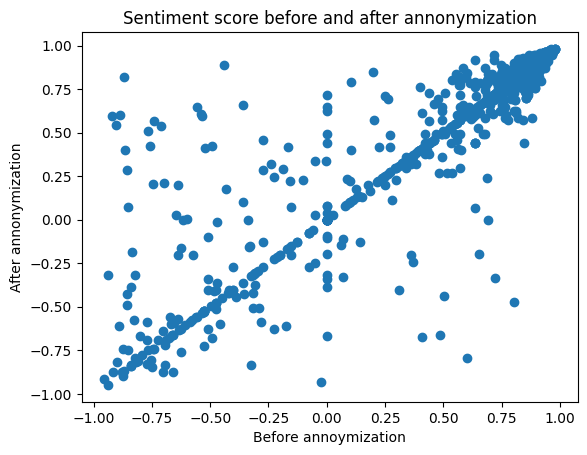

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


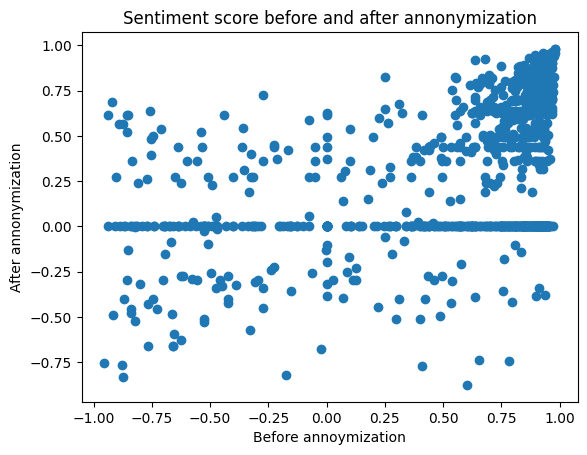

In [ ]:
plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [46]:
utilization_utils.sentiment_test(df_2, 'txt')

32     dolly parton - the grass is blue: this is a gr...
679    this book is great!: this book is an excellent...
146    interfaith symbol charm: the order came in a t...
428    r. kelly's best album!!!!!!!!!!!!!!!!!!!!!!!!!...
864    110% derivative: i liked this book better when...
                             ...                        
74     great movie: thanks for the great price and mo...
84     i needed that....: it is a good book for revie...
374    useless: it does not work at all! or if i used...
735    copy of a copy: this was definitely not worth ...
112    i love my card holders: it makes so much easie...
Name: txt, Length: 805, dtype: object


0.7723076923076924

In [47]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

599    fun hd : it get here a little late , but was v...
269    this is epic ! ! : this soundtrack is just lik...
691    movie : i love watch ass dancing . i love patr...
5      great : this is probably the fun essay i have ...
787    great condition : this book come in great cond...
                             ...                        
471    eternity ring : i order the size i rarely wear...
886    fun : fun tools book in a protective case . no...
352    love , love it ! ! : this was a very nice surp...
812    worth the money : this is something you will r...
61     extremely comprehensive language to the langua...
Name: anon_txt, Length: 805, dtype: object


0.7578846153846154

The fully anonymized text gets he highest accuracy score!

In [48]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

366    * * : i * this book - did n't * it to * ! a * ...
753    * something in the * : i * the * * is well tha...
784    the * * : if you are * in why * * what they * ...
722    * answer : this * was * . it show * of * , * a...
626    this book is not * ! : there are no * in this ...
                             ...                        
126    * * ! : i answer this * in one * . that 's a *...
713    too much * on * : the * was great , but the to...
927    * ! : i * all * to j.f.f . * so this book is j...
912    the * : this was a great * i * the * and all o...
94     * for me : i like * was * for it i find it i g...
Name: force_anon_txt, Length: 805, dtype: object


0.8171153846153847

In [50]:
print(nlp_utils.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
len(nlp_utils.stopwords.words('english'))

179